# Frequency arangement

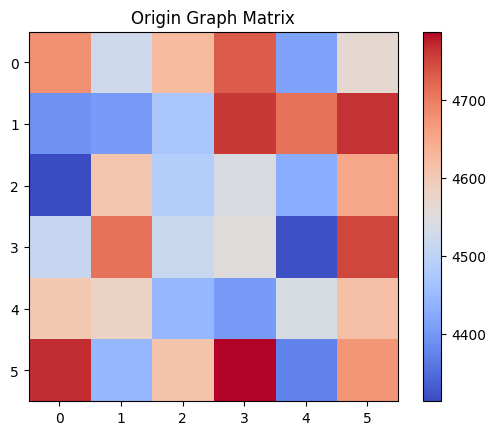

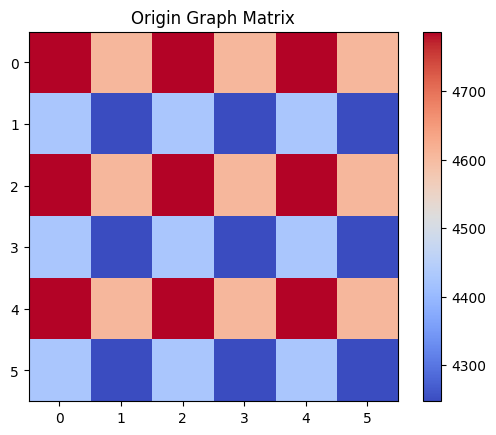

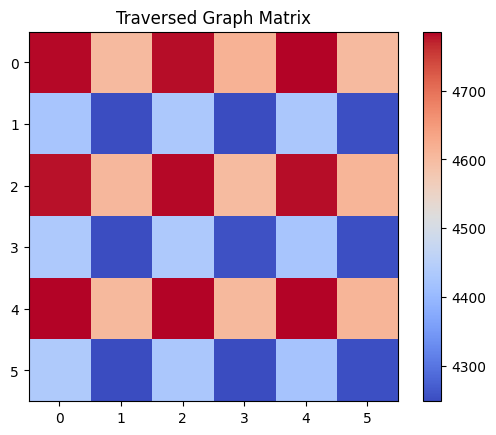

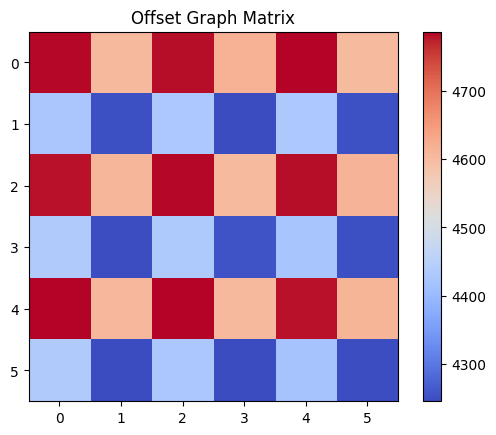

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [2]:
import numpy as np
from queue import Queue
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.io import savemat
#Author: Tingting Pikachu Lee

min_freq = 4300
max_freq = 4800

coupler_line_dif = 180
coupler_cross_dif = 540

min_disturb = 1
max_disturb = 10

def generate_random_matrix(n):
    return np.random.randint(min_freq,max_freq,size = [n,n])

#find max value
def get_start_pos(matrix):
    value = np.max(np.max(matrix, axis=0))
    pos = np.where(matrix == value)
    row = pos[0][0]
    col = pos[1][0]
    return row,col

def traverse(matrix):
    matrix=deepcopy(matrix)
    px,py = get_start_pos(matrix)
    value = matrix[px][py]

    if value<max_freq-coupler_cross_dif:
        value = np.random.randint(max_freq-coupler_cross_dif,max_freq)

    n = len(matrix)
    i=0
    while i < n:
        j=0
        while j < n:
            matrix[i][j] = value
            if j+1 < n:
                matrix[i][j+1] = value - coupler_line_dif
            if i+1 < n:
                matrix[i+1][j] = value - coupler_line_dif*2
            if i+1 < n and j+1 < n:
                matrix[i+1][j+1] = value -coupler_cross_dif
            j += 2
        i += 2
    return matrix


def disturbance(m1,m2):
    n = len(m1)
    for i in range(n):
        for j in range(n):
            if(m1[i][j]<m2[i][j]):
                m1[i][j]=min(m2[i][j],m1[i][j]+np.random.randint(min_disturb,max_disturb))
            else:
                m1[i][j]=max(m2[i][j],m1[i][j]-np.random.randint(min_disturb,max_disturb))
    
    return m1

def eliminate_duplication(matrix):
    hmp = {}
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if matrix[i][j] in hmp:
                while(matrix[i][j] in hmp):
                    matrix[i][j] -= 1
                
            hmp[matrix[i][j]] = 1
    
    return matrix



m1 = generate_random_matrix(6)
nonlinearity = -234
isolation_distance = nonlinearity*2/3
# Construct an traversal matrix

traversal_matrix = np.array([[0, isolation_distance], [2*isolation_distance, 3*isolation_distance]])

plt.imshow(m1, cmap='coolwarm')
plt.title('Origin Graph Matrix')
plt.colorbar()
plt.show()


m2 = traverse(m1)

plt.imshow(m2, cmap='coolwarm')
plt.title('Origin Graph Matrix')
plt.colorbar()
plt.show()

matrix=disturbance(m2,m1)
# Stitching matrix by descending order
plt.imshow(matrix, cmap='coolwarm')
plt.title('Traversed Graph Matrix')
plt.colorbar()
plt.show()

eliminate_duplication(matrix)
#frequency adjustment
plt.imshow(matrix, cmap='coolwarm')
plt.title('Offset Graph Matrix')
plt.colorbar()
plt.show()
# savemat('tilde.mat',matrix/1000)